# MIE 37 - Final Exam 2024

**Name**: ROUILLARD

**Surname**: Pierre

After completing the following questions, send the edited notebook to
`pablo.winant@ensae.fr`.

You are allowed to use any online available resource, even to install
Julia packages, but not to copy/paste any code.

Also, don’t forget to comment your code and take any initiative you find
relevant.

## Part I - Linear Regression and Stochastic Gradient Descent

We consider the following data generation process:

$$y=0.4+2.5 x + \epsilon$$

where $x_i$ is uniformly distributed between 0 and 1 and $\epsilon$ is
drawn from a normal distribution with standard deviation $\sigma=0.5$.

1.  **Write a function
    `draw(a::Number, b::Number)::Tuple{Float64, Float64}` which
    generates one random draw for a pair $(x,y)$.**

In [1]:
using Plots, Distributions, Random, ForwardDiff

In [2]:
nl = Normal(0.0,0.5)

function draw(a,b)
    x = rand()
    y = 0.4 + 2.5*x + rand(nl)
    return (x,y)
end

draw (generic function with 1 method)

1.  **Generate a sample $d=(x_i, y_i)_{i=[1,N]}$ of $N=100000$ different
    observations. Justify your choice for how to represent this data.**

In [3]:
# I know I am not using draw for this question but I like this way better

_y(x) = 0.4 + 2.5*x + rand(nl)
x = rand(100000)

d = (;
    x = x,
    y = _y.(x))
d

# I like using this object type, makes it easy to access and understand what I am looking at/using later on
# Vectors make application of function easy

(x = [0.3681982037061845, 0.9404304983814067, 0.43426812348369115, 0.3526727616631792, 0.9638694398984831, 0.5575040824373279, 0.8431499232287791, 0.4728170224060366, 0.7806841118833645, 0.039974990134646116  …  0.08046493144020916, 0.9871830854707071, 0.7201359436842784, 0.9358064230079999, 0.10237201763315762, 0.35023943263848933, 0.949659475327075, 0.8776807096319491, 0.5197831214520903, 0.37548469371057025], y = [1.4434047474198919, 2.4256723904307775, 1.1306734132076552, 0.9677235722489994, 3.194356318523463, 2.2609511322199305, 1.4223020040021137, 1.64666622189041, 1.6691196554019245, 0.6754208414903115  …  0.0500438597575098, 2.8279030323624523, 1.8642419534181605, 2.3318727627769236, 1.3208522752233725, 1.9983905461532214, 3.0647428996918396, 1.859054290908124, 2.3960376749186185, 0.6799815842988594])

1.  **Write the loss function
    $L(d,a,b)=\frac{1}{N}\sum_{i=1}^N ( a x_i + b-y_i)^2$. Find the
    values of $a$ and $b$ minimizing this function by implementing the
    gradient descent algorithm (do not use any library). What is the
    best learning rate?**

In [4]:
function Loss(a,b,d)
    (;x,y) = d
    L = sum((a*x .+b .- y).^2) / length(x)
    return L
end

# change the formating of loss to make things easier for the ForwardDiff.gradient line...
Loss(p::Vector{}, d) = Loss(p[1],p[2],d)

# ForwardDiff.gradient( p->Loss(p,d), [1.0,2.0])

Loss (generic function with 2 methods)

In [5]:
#! --- OPT via GRADIENT DESCENT
function GD(p0,d; T=100, τ_δ=10^(-10), λ=0.1)

    a_L = Float64[]
    b_L = Float64[]
    Loss_L = Float64[]
    push!(a_L,p0[1])
    push!(b_L,p0[2])
    push!(Loss_L,Loss(p0,d))
    local δ
    for t in 1:T
        p1 = p0 - λ*ForwardDiff.gradient( p->Loss(p,d), p0)
        δ = maximum(abs.(p1-p0))
        p0 = p1
        push!(a_L,p0[1])
        push!(b_L,p0[2])
        push!(Loss_L,Loss(p0,d))
    end
    return (;CV=(δ<τ_δ),δ=δ,p=p0, Loss_L=Loss_L, a_L=a_L, b_L=b_L, T=T)
end

GD (generic function with 1 method)

In [6]:
Loss_opti_GD1 = GD([1.0,2.0],d ; T=250, λ=0.01)
Loss_opti_GD2 = GD([1.0,2.0],d ; T=250, λ=0.05)
Loss_opti_GD3 = GD([1.0,2.0],d ; T=250, λ=0.1)
Loss_opti_GD4 = GD([1.0,2.0],d ; T=250, λ=0.3)
Loss_opti_GD5 = GD([1.0,2.0],d ; T=250, λ=0.5)
Loss_opti_GD6 = GD([1.0,2.0],d ; T=250, λ=0.7)
Loss_opti_GD7 = GD([1.0,2.0],d ; T=250, λ=1.0)

(CV = false, δ = 3.2243673265318447e46, p = [1.0443916162579018e46, 1.9522142605533608e46], Loss_L = [1.1664977479889438, 1.9489440686004815, 3.9050206537975196, 8.596888212775562, 19.710226958355786, 45.929728984064646, 107.71107531893935, 253.2287200063207, 595.9318905595752, 1402.9861580101228  …  2.7890293232769464e89, 6.567941928623716e89, 1.5466980148881666e90, 3.6423506408198215e90, 8.577445670052027e90, 2.019920141629595e91, 4.7567510602910956e91, 1.1201769903302273e92, 2.6379275975575174e92, 6.212109398805064e92], a_L = [1.0, 0.4000222682317236, 1.9041646018978995, 0.10226350428293585, 3.3068127456204213, -1.2294874809915655, 6.062726159378573, -4.840540119391215, 12.14056424220355, -13.701929388272617  …  -2.212943722243785e44, 3.3959280592099913e44, -5.2113062195891205e44, 7.997140116285637e44, -1.2272211101144525e45, 1.8832628054665882e45, -2.8900079742949597e45, 4.43493391747796e45, -6.805738609491103e45, 1.0443916162579018e46], b_L = [2.0, 0.29462876665108495, 2.599525777

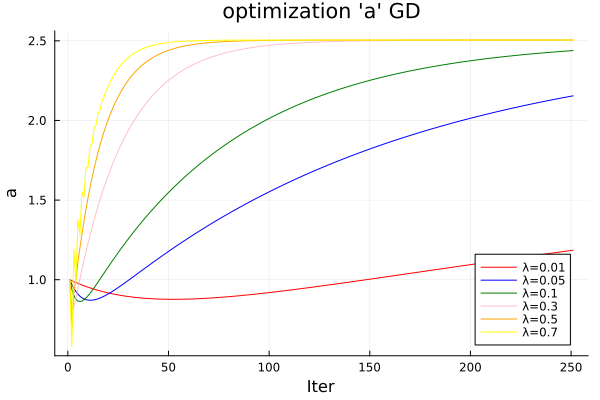

In [7]:
plot(Loss_opti_GD1.a_L, color="red", label="λ=0.01", title="optimization 'a' GD", xaxis="Iter", yaxis="a")
plot!(Loss_opti_GD2.a_L, color="blue", label="λ=0.05")
plot!(Loss_opti_GD3.a_L, color="green", label="λ=0.1")
plot!(Loss_opti_GD4.a_L, color="pink", label="λ=0.3")
plot!(Loss_opti_GD5.a_L, color="orange", label="λ=0.5")
plot!(Loss_opti_GD6.a_L, color="yellow", label="λ=0.7")
# -- higher values cause WAY too much instability
#plot!(Loss_opti_GD7.a_L, color="black", label="λ=1.0")

#! λ around 0.5 seem to work best

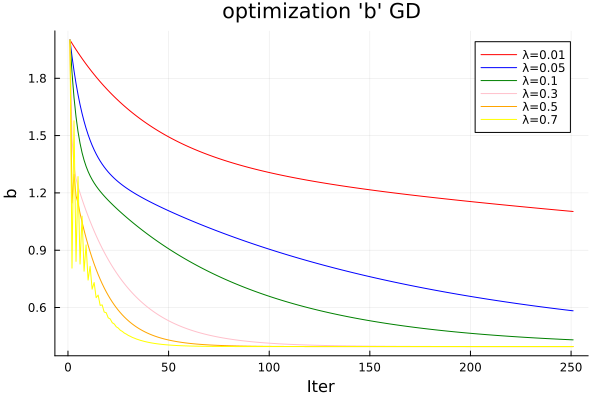

In [8]:
plot(Loss_opti_GD1.b_L, color="red", label="λ=0.01", title="optimization 'b' GD", xaxis="Iter", yaxis="b")
plot!(Loss_opti_GD2.b_L, color="blue", label="λ=0.05")
plot!(Loss_opti_GD3.b_L, color="green", label="λ=0.1")
plot!(Loss_opti_GD4.b_L, color="pink", label="λ=0.3")
plot!(Loss_opti_GD5.b_L, color="orange", label="λ=0.5")
plot!(Loss_opti_GD6.b_L, color="yellow", label="λ=0.7")
# -- higher values cause WAY too much instability
#plot!(Loss_opti_GD7.a_L, color="black", label="λ=1.0")

#! λ around 0.5 seem to work best

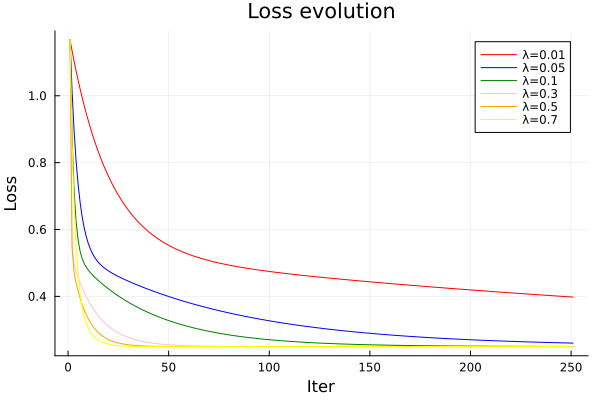

In [9]:
plot(Loss_opti_GD1.Loss_L, color="red", label="λ=0.01", title="Loss evolution", xaxis="Iter", yaxis="Loss")
plot!(Loss_opti_GD2.Loss_L, color="blue", label="λ=0.05")
plot!(Loss_opti_GD3.Loss_L, color="green", label="λ=0.1")
plot!(Loss_opti_GD4.Loss_L, color="pink", label="λ=0.3")
plot!(Loss_opti_GD5.Loss_L, color="orange", label="λ=0.5")
plot!(Loss_opti_GD6.Loss_L, color="yellow", label="λ=0.7")

1.  **Write another function
    `ξ(a::Number, b::Number)::Tuple{Float64, Float64, Float64}` which
    returns a random realization of $( a x + b - y)^2$ as well as its
    derivatives w.r.t. `a` and `b` (make sure the derivatives are
    computed for the same realization of $\epsilon$). We call `ξ` the
    empirical loss.**

(hint: here you can either compute the derivatives by hand, or use an
automatic differentiation library)

In [10]:
function ξ(a, b)
    x = rand()
    ε = rand(nl)
    y = 0.4 + 2.5*x + ε
    r(p) = (p[1]*x+p[2] - y)^2
    g = ForwardDiff.gradient( p->r(p), [a,b])

    return (;r=r([a,b]), deriv=g)
end

ξ(1.0,2.0)

(r = 0.05197321947792147, deriv = [-0.3039841193738599, -0.45595271455676833])

**5. Stochastic gradient algorithm.**

The stochastic gradient algorithm minimizes $$E\xi(a,b)$$ with the
following steps:

-   start with an initial guess $a_0,b_0$
-   given a guess $a_k, b_k$
    -   compute $\xi, \xi^{prime}_a, \xi^{prime}_b$ using the function
        from the last function
    -   make a new guess
        $(a_{k+1}, b_{k+1}) = (1-\lambda) (a_{k}, b_{k}) - \lambda (\xi^{\prime}_a, \xi^{\prime}_b)$

**Implement the SGD algorithm. How many iterations does one needs to get
a good approximation of $a,b$? What value of \$ \$ works better? Compare
with question 3.**

In [11]:
#! --- OPT via SGD
function SGD(p0::Vector{Float64}; T=100, τ_δ=10^(-10), λ=0.1)

    a_L = Float64[]
    b_L = Float64[]
    Loss_L = Float64[]
    ELoss_L = Float64[]
    push!(a_L,p0[1])
    push!(b_L,p0[2])
    push!(Loss_L,Loss(p0,d))
    push!(ELoss_L,sum([ξ(p0[1], p0[2]).r for k in 1:1000]/1000))
    local δ

    for t=1:T
        e = ξ(p0[1], p0[2])
        p1 = (1-λ)*p0 - λ*e.deriv
        δ = maximum(abs.(p1-p0))
        p0 = p1
        push!(a_L,p0[1])
        push!(b_L,p0[2])
        push!(Loss_L,Loss(p0,d))
        push!(ELoss_L,sum([ξ(p0[1], p0[2]).r for k in 1:1000]/1000))
    end
    return (;CV=(δ<τ_δ),δ=δ,p=p0, Loss_L=Loss_L, ELoss_L=ELoss_L, a_L=a_L, b_L=b_L, T=T)
end
    

SGD (generic function with 1 method)

In [25]:
Loss_opti_SGD1 = SGD([1.0,2.0] ; T=250, λ=0.001)
Loss_opti_SGD2 = SGD([1.0,2.0] ; T=25000, λ=0.01)
Loss_opti_SGD3 = SGD([1.0,2.0] ; T=250, λ=0.05)
Loss_opti_SGD4 = SGD([1.0,2.0] ; T=250, λ=0.1)
#Loss_opti_SGD5 = SGD([1.0,2.0] ; T=250, λ=0.5)
#Loss_opti_SGD6 = SGD([1.0,2.0] ; T=250, λ=0.7)
# Loss_opti_SGD7 = SGD([1.0,2.0] ; N=250, λ=1.0)

(CV = false, δ = 0.07765509591736358, p = [0.5461848266468061, 0.5314254413063568], Loss_L = [1.1664977479889438, 0.6720810908018512, 0.6338818547129977, 0.5293150829950455, 0.572881119347775, 0.5319089614189034, 0.5176146523603538, 0.5301682765258487, 0.4831973787391206, 0.49348851159687707  …  0.872492268197364, 0.810778321011838, 0.7419859102981742, 0.5466729572095501, 0.5580826882530137, 0.6419893447494768, 0.7678343080006129, 1.1130567394121251, 1.471312174621686, 1.2810822550177206], ELoss_L = [1.1594685877988078, 0.7039803986808576, 0.6673004193912594, 0.5356100973687288, 0.5878125011582643, 0.508562542390349, 0.5167425999397998, 0.531730016389302, 0.45820577724993616, 0.5170409520578104  …  0.8598293997871344, 0.796782599873744, 0.7050416904002399, 0.5281914640812474, 0.565598625125539, 0.650921946308103, 0.8356930347731926, 1.0978643587028836, 1.469291357009082, 1.26763838679971], a_L = [1.0, 0.8487726185081883, 0.8701961640583492, 0.7716099887309205, 0.6488233039976876, 0.715

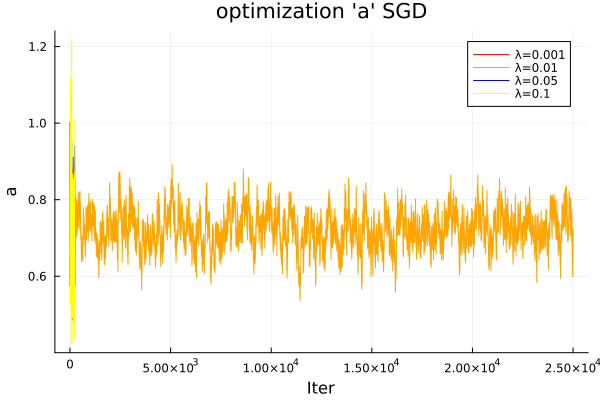

In [26]:
plot(Loss_opti_SGD1.a_L, color="red", label="λ=0.001", title="optimization 'a' SGD", xaxis="Iter", yaxis="a")
plot!(Loss_opti_SGD2.a_L, color="orange", label="λ=0.01")
plot!(Loss_opti_SGD3.a_L, color="blue", label="λ=0.05")
plot!(Loss_opti_SGD4.a_L, color="yellow", label="λ=0.1")
# -- higher values cause WAY too much instability
#plot!(Loss_opti_SGD5.a_L, color="pink", label="λ=0.5")
#plot!(Loss_opti_SGD6.a_L, color="orange", label="λ=0.7")
#plot!(Loss_opti_SGD7.a_L, color="yellow", label="λ=1.0")

#! λ around 0.01 seem to work best

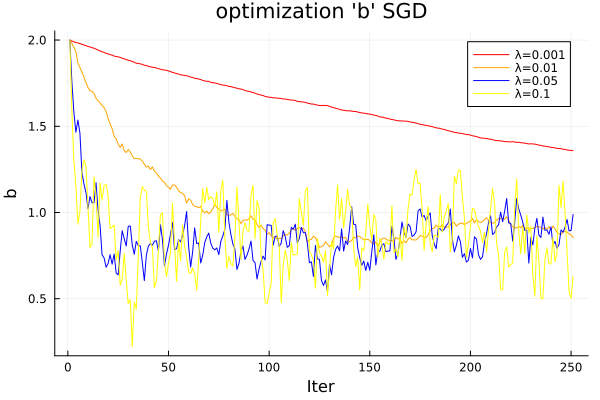

In [14]:
plot(Loss_opti_SGD1.b_L, color="red", label="λ=0.001", title="optimization 'b' SGD", xaxis="Iter", yaxis="b")
plot!(Loss_opti_SGD2.b_L, color="orange", label="λ=0.01")
plot!(Loss_opti_SGD3.b_L, color="blue", label="λ=0.05")
plot!(Loss_opti_SGD4.b_L, color="yellow", label="λ=0.1")
# -- higher values cause WAY too much instability

#! λ around 0.001 seem to work best

**6. (bonus) Illustrate the convergence by plotting the empirical loss
for each step $k$ in the above alogorithm, as well as the validation
loss in the same step. (Given $a,b$, the validation loss is the
empirical mean of $\xi(a,b)$ computed using $N=1000$ observations.)**

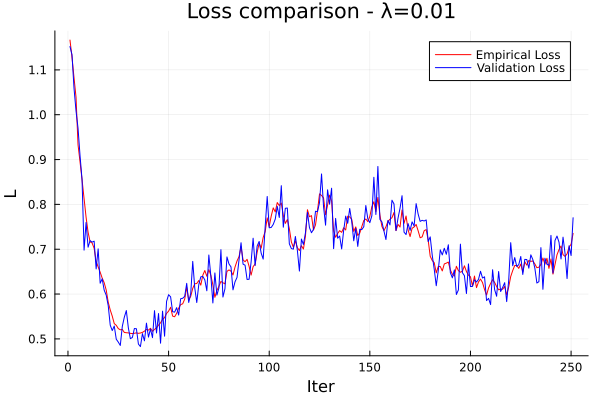

In [15]:
plot(Loss_opti_SGD2.Loss_L, color="red", label="Empirical Loss", title="Loss comparison - λ=0.01", xaxis="Iter", yaxis="L")
plot!(Loss_opti_SGD2.ELoss_L, color="blue", label="Validation Loss")

## Part II - Endogenous Exit

### Discretization of an AR1

The following code, taken from Quantecon.jl approximates an AR1 process
$y_t = \mu + \rho (y_{t-1}-\mu) + \epsilon_t$ (where $\nu$ is the
standard deviation of normal process $\epsilon$), using a finite markov
chain with $N$ different values.

The output is a transition matrix and a vector containing discretized
values $y_1, y_2, ... y_p$

In [16]:
# uncomment the following line if "SpecialFunctions" is not on your system
#import Pkg; Pkg.add("SpecialFunctions")

using SpecialFunctions: erfc

std_norm_cdf(x::T) where {T <: Real} = 0.5 * erfc(-x/sqrt(2))
std_norm_cdf(x::Array{T}) where {T <: Real} = 0.5 .* erfc(-x./sqrt(2))

function tauchen(N::Integer, ρ::T1, σ::T2, μ=zero(promote_type(T1, T2)), n_std::T3=3) where {T1 <: Real, T2 <: Real, T3 <: Real}
    # Get discretized space
    a_bar = n_std * sqrt(σ^2 / (1 - ρ^2))
    y = range(-a_bar, stop=a_bar, length=N)
    d = y[2] - y[1]

    # Get transition probabilities
    Π = zeros(promote_type(T1, T2), N, N)
    for row = 1:N
        # Do end points first
        Π[row, 1] = std_norm_cdf((y[1] - ρ*y[row] + d/2) / σ)
        Π[row, N] = 1 - std_norm_cdf((y[N] - ρ*y[row] - d/2) / σ)

        # fill in the middle columns
        for col = 2:N-1
            Π[row, col] = (std_norm_cdf((y[col] - ρ*y[row] + d/2) / σ) -
                           std_norm_cdf((y[col] - ρ*y[row] - d/2) / σ))
        end
    end

    yy = y .+ μ / (1 - ρ) # center process around its mean (wbar / (1 - rho)) in new variable

    (;transitions=Π, values=yy)

end

tauchen (generic function with 3 methods)

**1. Take $\rho=0.95, \mu=0.1, \nu=0.1$. Approximate the AR1 with 200
discrete states, using the tauchen function above. Check that all rows
sum to 1. Compute and plot the steady-state distribution.**

In [17]:
ar1_approx = tauchen(200, 0.95, 0.1, 0.1)
sum(ar1_approx.transitions,dims=2) # rows indeed sum to 1

200×1 Matrix{Float64}:
 1.0000000000000009
 1.0000000000000013
 1.0000000000000013
 1.0000000000000013
 1.0000000000000013
 1.0000000000000013
 1.0000000000000013
 1.0000000000000013
 1.0000000000000013
 1.0000000000000013
 ⋮
 1.0000000000000013
 1.000000000000001
 1.0000000000000013
 1.0000000000000013
 1.000000000000001
 1.0000000000000013
 1.000000000000001
 1.000000000000001
 1.0000000000000009

Consider a firm whose productivity $y_t$ is exogenous and evolves
according to the markov chain above.

Profits are given by $\pi(y_t) = y_t$.

At the start of each period, the firm decides whether to remain in
operation and receive current profit $\pi_t$ or to exit and receive
scrap value $s>0$ for the sale of physical assets.

Time is discounted using interest rate, that is
$\beta=\frac{1}{1+r} \in [0,1[$.

The following code creates a parameterization of the firm’s problem:

In [18]:
"Creates an instance of the firm exit model. J'ai dû corriger z_vals, Q  avec les bons attributs"
function create_exit_model(;
    n=200, # productivity grid size
    ρ=0.95, μ=0.1, ν=0.1, # persistence, mean and volatility
    β=0.98, s=100.0 # discount factor and scrap value
    )
    mc = tauchen(n, ρ, ν, μ)
    z_vals, Q = mc.values, mc.transitions
    return (; n, z_vals, Q, β, s)
end

create_exit_model

**2. What are the states of the problem? The controls? The rewards? What
equation defines the value of the firm? How would you represent
numerically the value function and the decision rule?**

- States : productivity $\in [y_1, \dots, y_p$]
- Action : take profit or scrape (here *false* = don't take profit = scrape)
- Reward : profit $\pi(y_t) = y_t$

- Value(state_s) = reward + $\beta$*max[s if action=scrap,E[pi] if action=take_profit]
; Where E[pi] = Sum over states s' of : p(s'|state_s,action=take profit)\*Value(state_s')
- Can represent the value function and the decision rule by two large vectors (number of rows = number of productivity levels)

In [19]:
V_0 = [0.0 for i=1:size(ar1_approx.transitions,1)]
x_0 = [false for i=1:size(ar1_approx.transitions,1)]

200-element Vector{Bool}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0

**3. Solve for the optimal exit decision using value function iteration.
Plot the results.**

In [20]:
distance(v1::Vector,v2::Vector) = maximum(abs.(v2-v1))

model = create_exit_model()
model

(n = 200, z_vals = 1.0392310771694757:0.009655969073673595:2.960768922830521, Q = [0.33283268994867254 0.035774340757924517 … 0.0 0.0; 0.30019619386767143 0.03439273186444319 … 0.0 0.0; … ; 1.7641418264378537e-77 8.866118616048715e-77 … 0.03439273186444325 0.3001961938676714; 3.1752918163376773e-78 1.612793496199978e-77 … 0.035774340757924517 0.33283268994867254], β = 0.98, s = 100.0)

In [21]:
function bellman_step(V, m)
    (; n, z_vals, Q, β, s) = m

    # do not care about the initial values here, it is just to initialize the objects
    T_V = [0.0 for i=1:n]
    T_x = [false for i=1:n]

    #! MAKE BEST CHOICE (=> update policy rule au passage... pas utile pour VFI)
    for i=1:n
        cont_V   = sum( Q[i,j]*V[j] for j=1:n ) # continuation value if take profit
        v_profit = z_vals[i] + β*cont_V
        v_scrap  = z_vals[i] + β*s
        if v_profit>v_scrap
            T_V[i] = v_profit
            T_x[i] = 1
        else
            T_V[i] = v_scrap
            T_x[i] = 0
        end
    end

    return T_V, T_x
end

# bellman_step(V_0, model)

bellman_step (generic function with 1 method)

In [22]:
function VFI(m; T=500, τ_η = 10^(-10), verbose=true)
    (; n, z_vals, Q, β, s) = m

    V_0 = [0.0 for i=1:n]

    for t=1:T
        T_V, T_x = bellman_step(V_0, m)
        η = distance(V_0,T_V)
        V_0 = T_V

        if verbose
            println("Iteration $(t): η $(η)")
            #println("Iteration $(t): V_U $(V_0)")
            #println("---------------")
            if η<τ_η
                println("---------------")
                println("Converged at Iteration $(t)")
                return (;value=V_0,policy=T_x)
            end
        end

    end
    error("No convergence")
end


VFI (generic function with 1 method)

In [23]:
VFI(model; T=1000)

Iteration 1: η 100.96076892283052
Iteration 2: η 0.8745055727127493
Iteration 3: η 0.803939215411674
Iteration 4: η 0.7420196309383016
Iteration 5: η 0.6863557754590772
Iteration 6: η 0.6357307649782911
Iteration 7: η 0.5893885426897612
Iteration 8: η 0.5468054943793561
Iteration 9: η 0.5075949868400329
Iteration 10: η 0.4714555774015423
Iteration 11: η 0.4381384340256318
Iteration 12: η 0.407426860247611
Iteration 13: η 0.37912432838410837
Iteration 14: η 0.3530481661149736
Iteration 15: η 0.3290266409790803
Iteration 16: η 0.30689786378559347
Iteration 17: η 0.2865095333133212
Iteration 18: η 0.26771897579413917
Iteration 19: η 0.25039320528387066
Iteration 20: η 0.23440888347843725
Iteration 21: η 0.21965213421114527
Iteration 22: η 0.20601821705712098
Iteration 23: η 0.19341109935778888
Iteration 24: η 0.18174296355157082
Iteration 25: η 0.1709336714431373
Iteration 26: η 0.16091020745126627
Iteration 27: η 0.15160612115154493
Iteration 28: η 0.14296098412505387
Iteration 29: η 0.1

(value = [99.03923107716948, 99.04888704624315, 99.05854301531683, 99.06819898439049, 99.07785495346417, 99.08751092253785, 99.09716689161152, 99.10682286068518, 99.11647882975886, 99.12613479883254  …  113.58440544656017, 113.68631368119343, 113.78562137140709, 113.88216260879214, 113.97577526983058, 114.06630372119828, 114.15360165468984, 114.23753497249588, 114.31798463357089, 114.3948493654252], policy = Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

**4. (bonus) Taking into account the specific nature of this problem,
propose a more efficient algorithm.**

In [24]:
# we can